#  Bibliotecas:

In [11]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [13]:
import matplotlib.patches as mpatches

In [14]:
%matplotlib inline

In [15]:
import glob

# Fazer e testar uma função que recebe como entrada um array de anos e um de meses e retorna um array de anos decimais.

In [39]:
dados = np.loadtxt (arquivo, comments = '%')

In [41]:
anos = dados [:, 0]
meses = dados[:, 1]

In [45]:
def anos_para_ano_decimal(anos , meses):
    assert type(anos) == np.ndarray, "Anos precisa ser um array"
    assert type(meses) == np.ndarray, "Meses presisa ser um array"
    ano_em_decimal = ((meses-1)/10 + anos)
    return (ano_em_decimal)

### Teste incorreto:

In [48]:
anos_para_ano_decimal(1,3) 

AssertionError: Anos precisa ser um array

### Teste correto:

In [49]:
anos_para_ano_decimal(anos, meses)

array([ 1845. ,  1845.1,  1845.2, ...,  2013.6,  2013.7,  2013.8])

# Fazer e testar uma função que recebe como entrada uma matriz (array 2d) de dados de temperaturas e retorna os anos decimais, a anomalia anual, anomalia de 10 anos e sua respectiva incerteza.

In [50]:
def temp_para_outros(dados):
    ano_em_decimal_1 = anos_para_ano_decimal (anos, meses)
    anomalia_anual_1 = dados [:, 4]
    anomalia_10_anos_1 = dados [:, 8] 
    unc_a10 = dados [:, 9]
    return (ano_em_decimal_1 , anomalia_anual_1 , anomalia_10_anos_1 , unc_a10)
    

In [53]:
temp_para_outros (dados)

(array([ 1845. ,  1845.1,  1845.2, ...,  2013.6,  2013.7,  2013.8]),
 array([   nan,    nan, -0.837, ...,    nan,    nan,    nan]),
 array([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 array([ nan,  nan,  nan, ...,  nan,  nan,  nan]))

# Usando as funções criadas acima para repetir a tarefa da prática Python 2.

In [38]:
arquivos = glob.glob("dados/*W-TAVG-Trend.txt")

In [18]:
for arquivo in arquivos:
    print(arquivo)

dados\0.80S-49.02W-TAVG-Trend.txt
dados\10.45S-48.27W-TAVG-Trend.txt
dados\13.66S-38.81W-TAVG-Trend.txt
dados\15.27S-47.50W-TAVG-Trend.txt
dados\2.41S-60.27W-TAVG-Trend.txt
dados\20.09S-44.36W-TAVG-Trend.txt
dados\20.09S-54.60W-TAVG-Trend.txt
dados\23.31S-42.82W-TAVG-Trend.txt
dados\23.31S-46.31W-TAVG-Trend.txt
dados\24.92S-49.66W-TAVG-Trend.txt
dados\29.74S-51.69W-TAVG-Trend.txt
dados\4.02S-40.98W-TAVG-Trend.txt


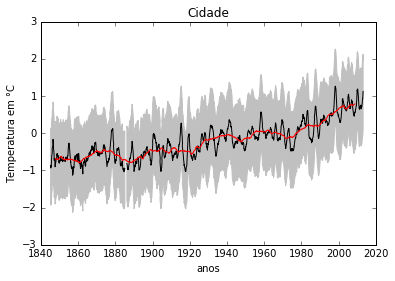

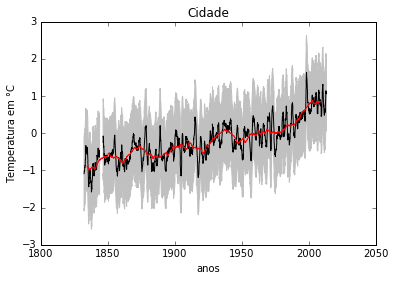

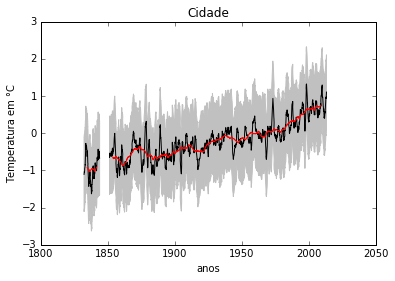

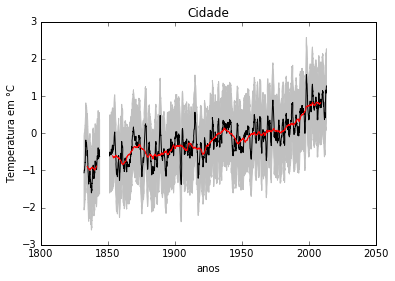

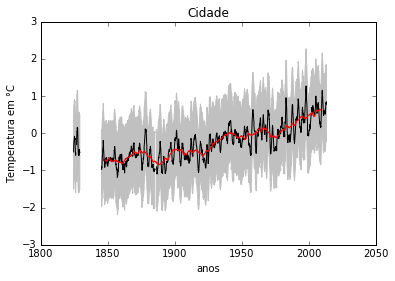

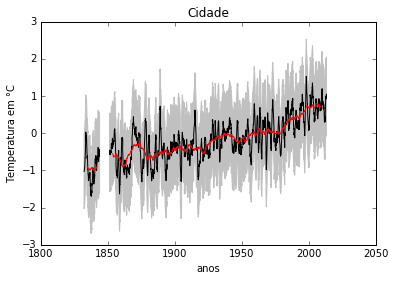

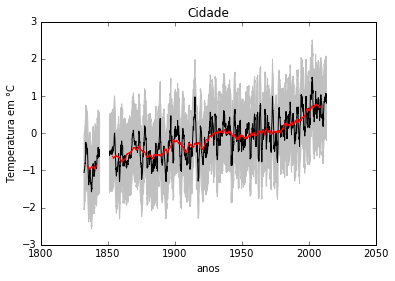

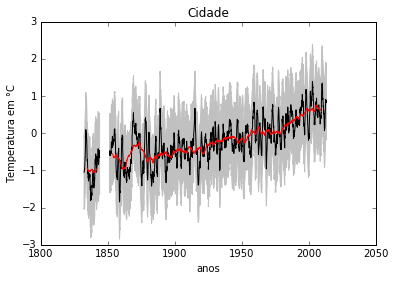

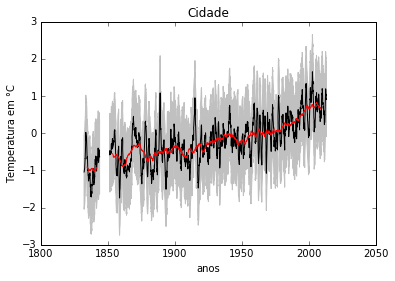

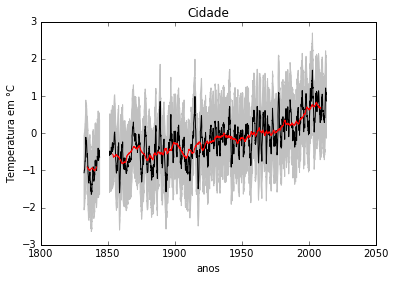

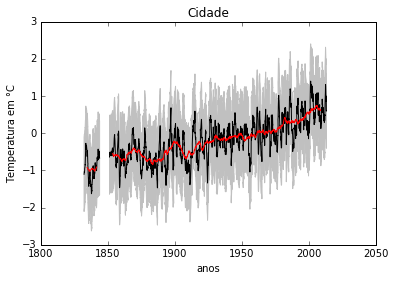

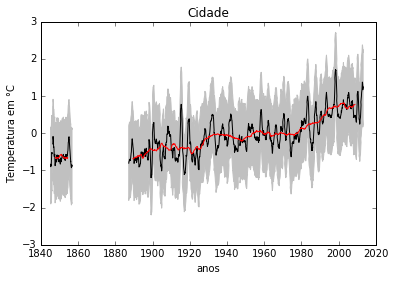

In [61]:
for arquivo in arquivos:
    dados = np.loadtxt (arquivo, comments='%')
    ano_em_decimal = anos_para_ano_decimal (anos = dados [:, 0], meses = dados [:, 1])
    anomalia_anual = dados [:, 4] 
    anomalia_10_anos = dados[:, 8]
    anos = dados [:, 0]
    
    plt.figure()
    plt.plot (ano_em_decimal, anomalia_anual, c = "#000000")
    plt.plot (ano_em_decimal, anomalia_10_anos, c = '#ff0000')
    plt.xlabel ("anos")
    plt.ylabel ("Temperatura em °C")
    plt.title("Cidade")
    plt.fill_between (ano_em_decimal, anomalia_anual + 1, anomalia_anual - 1, color = "#C0C0C0")
    plt.savefig("Grafico_das_cidades/" + arquivo [7:-3] + 'png', format = 'png')